In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'D:\\Python\Projects\HW1\auto-mpg.csv')

In [3]:
# Вывод первых 5-и строк
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  model-year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70


In [4]:
# Вывод информации о датасете
print(df.info())
print('-' * 110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB
None
--------------------------------------------------------------------------------------------------------------


In [5]:
# Проверка пустых значений
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64


In [6]:
# Вывод характеристик датасета
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  396.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.189394  2970.424623   
std      7.815984    1.701004    104.269838   38.402030   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   92.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model-year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


In [7]:
# Удаляем строки с пропущенными значениями
df = df.dropna(subset=['horsepower'])

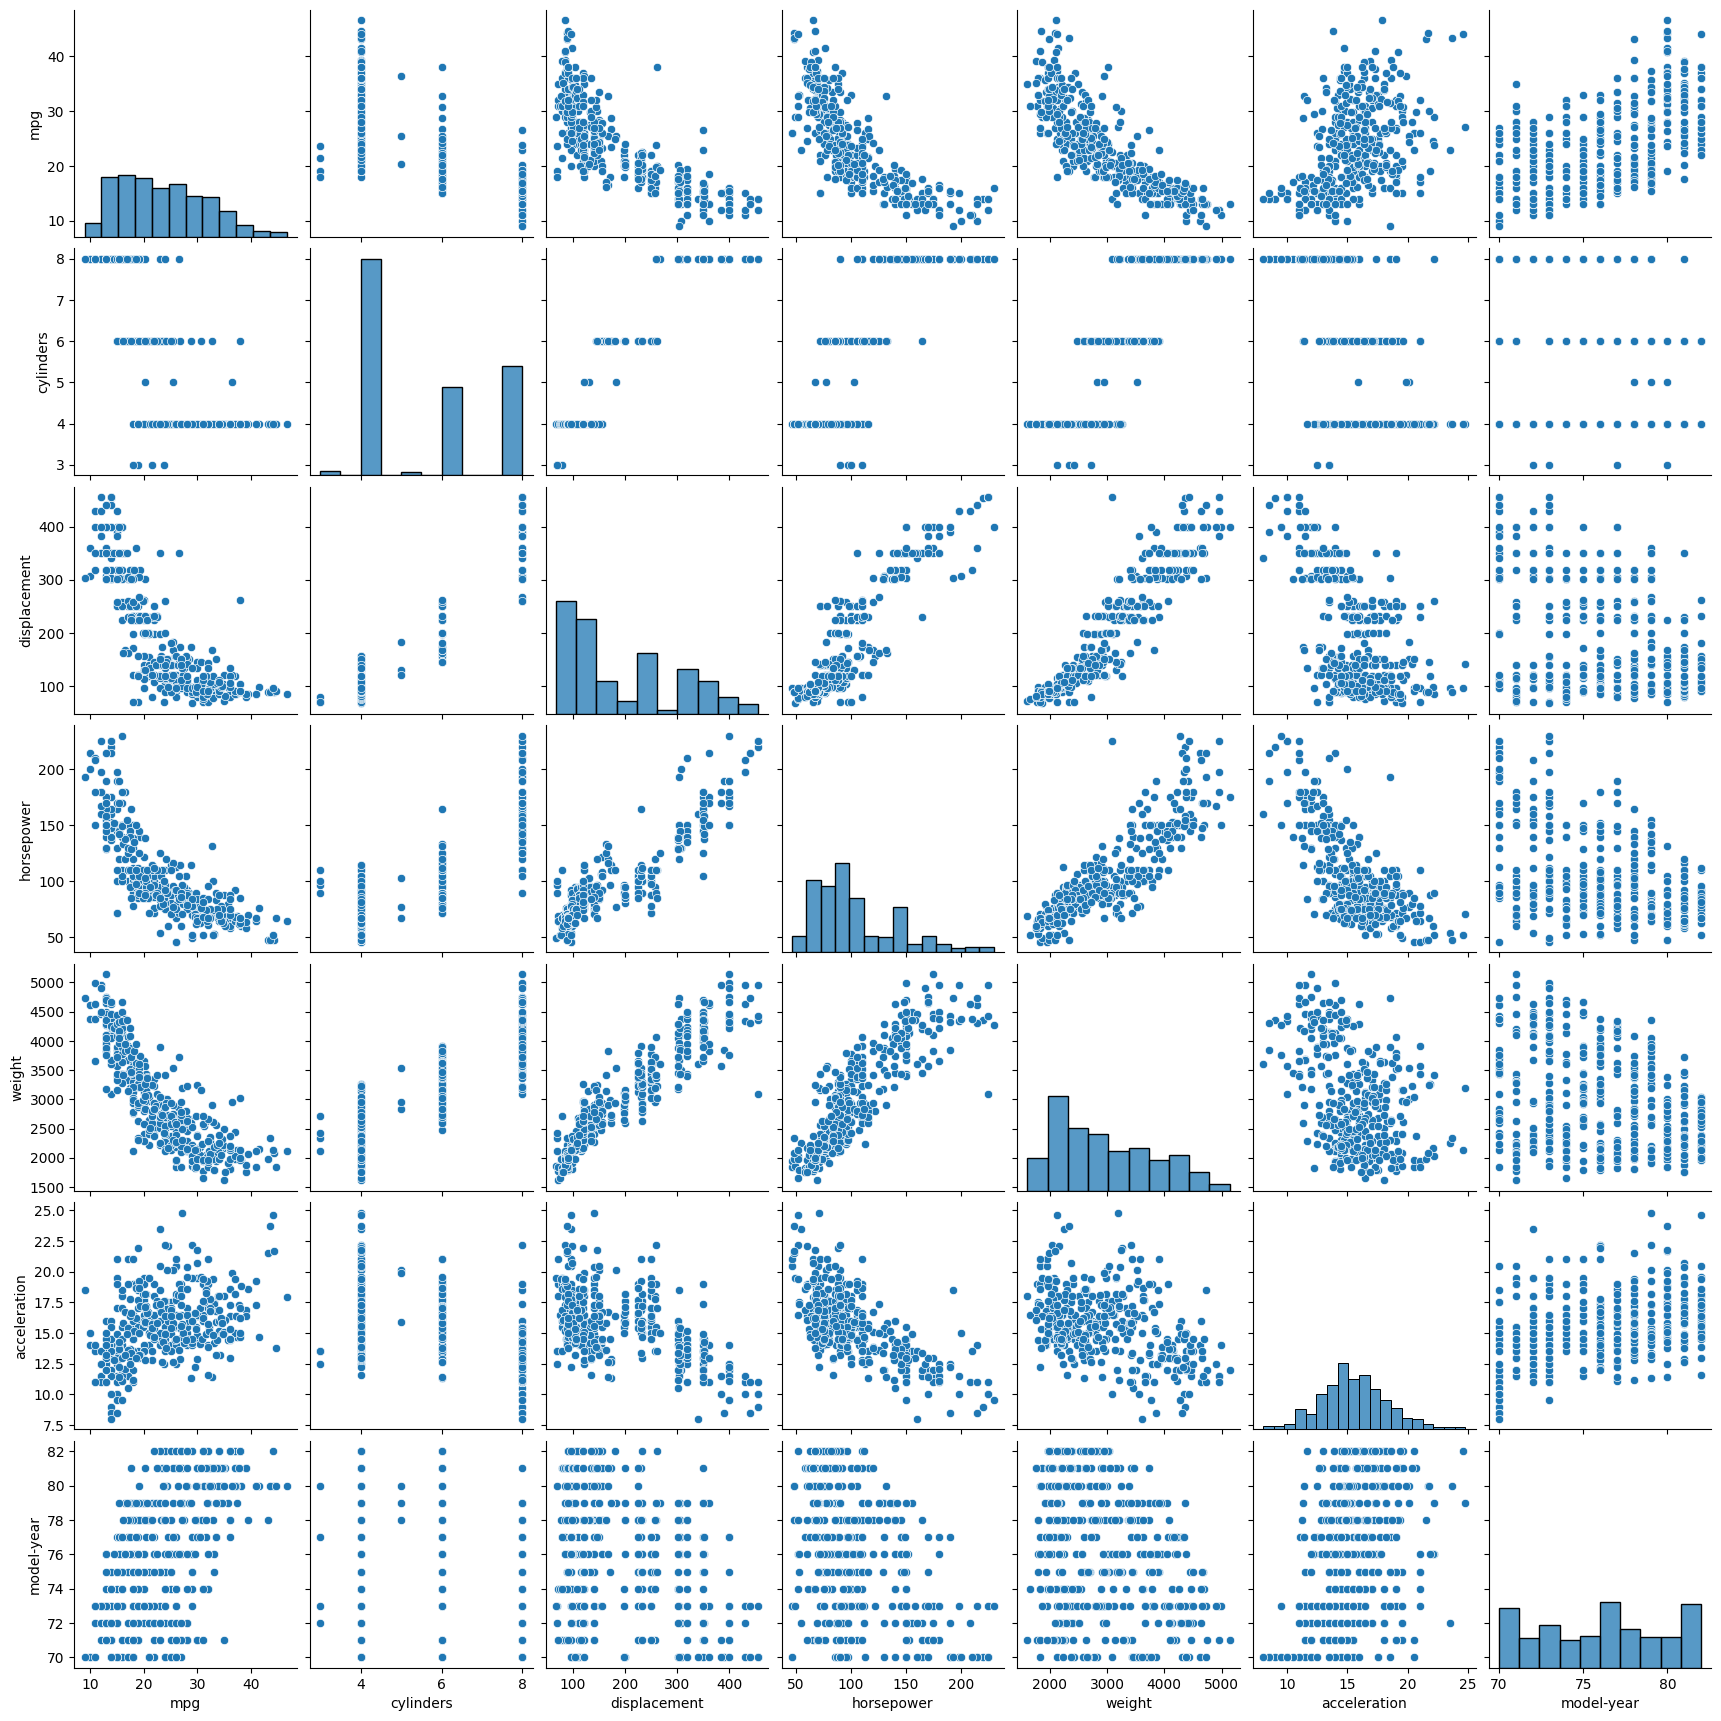

In [8]:
# Предварительная визуализация данных
sns.pairplot(df)
plt.show()

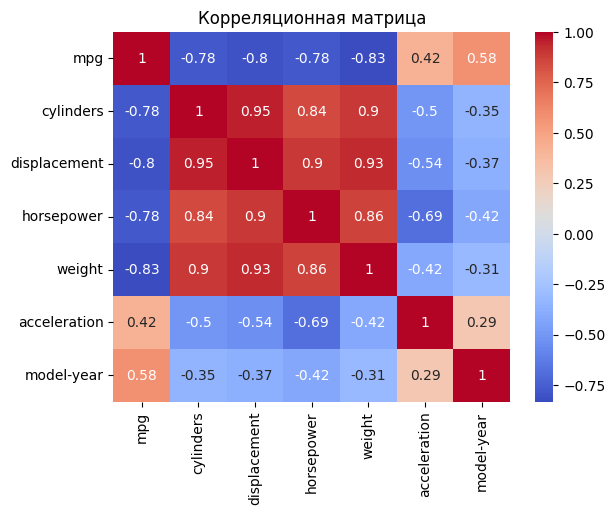

In [9]:
# Вывод корреляционной матрицы
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [10]:
# Определение признаков и целевой переменной
X = df.drop(['mpg'], axis=1)
y = df['mpg']
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# Определение и обучение моделей
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

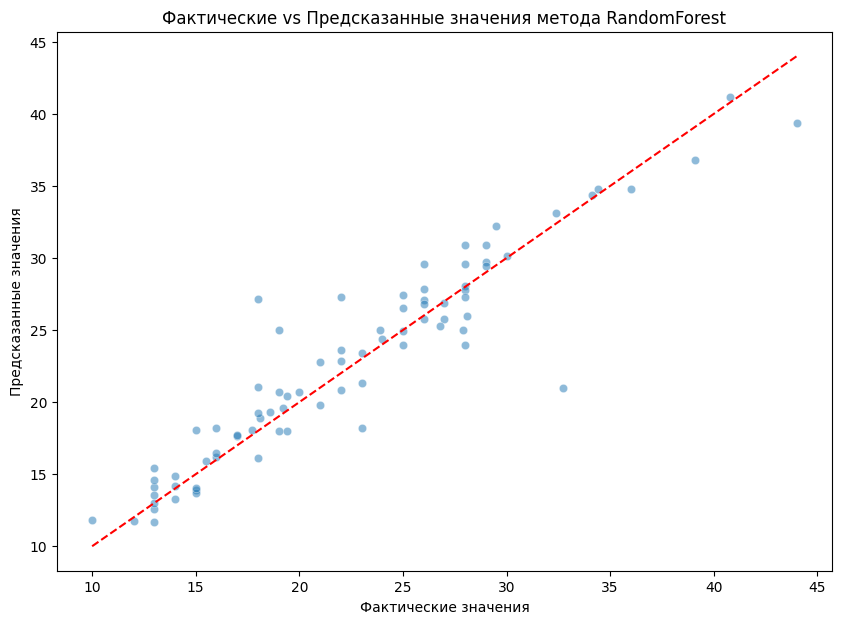

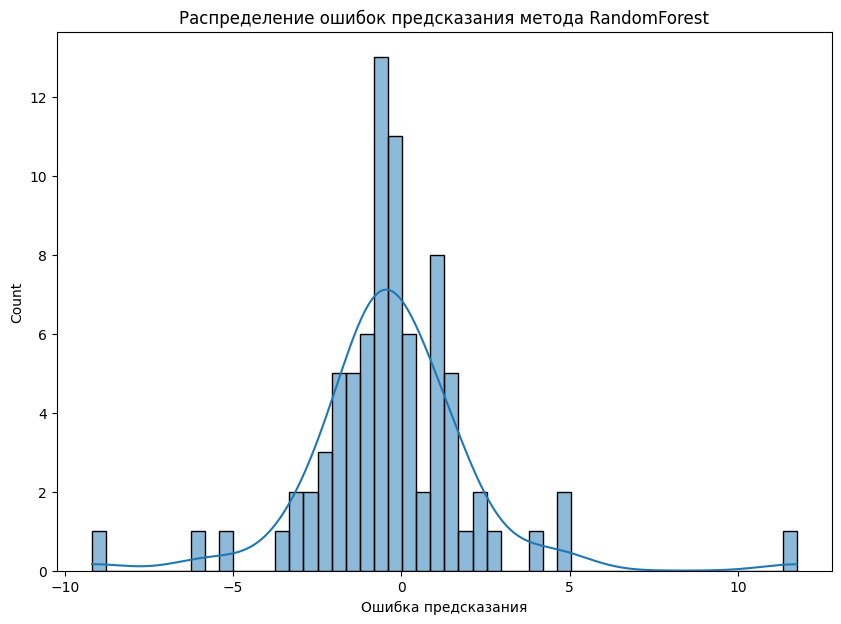

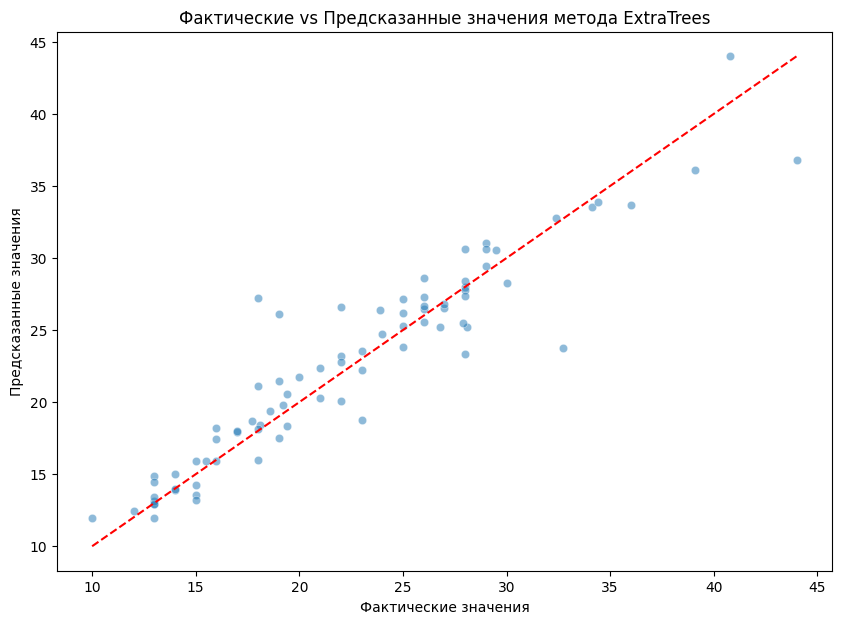

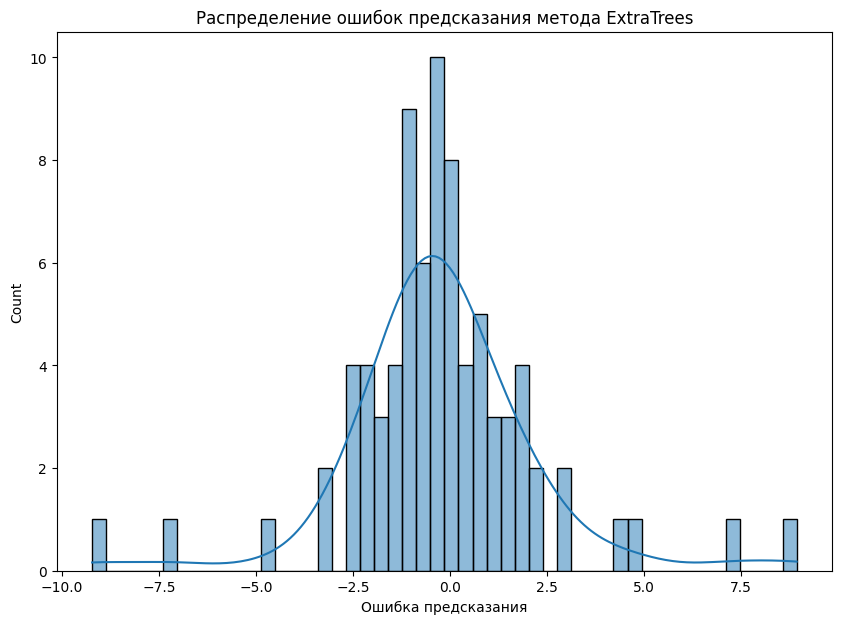

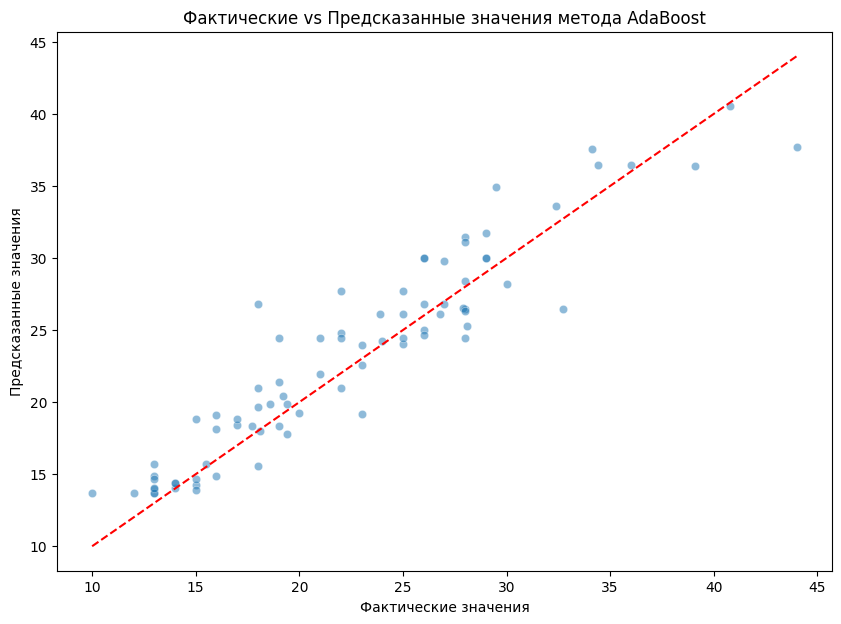

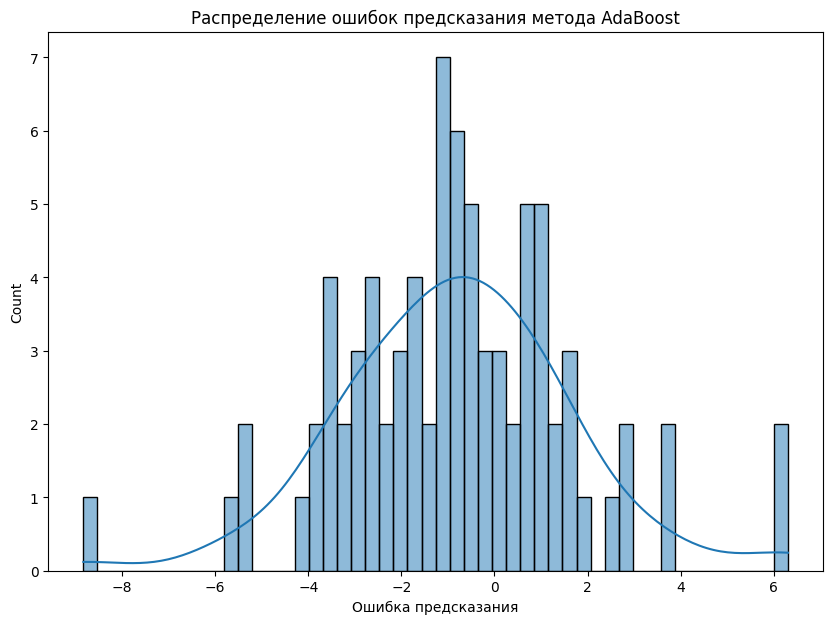

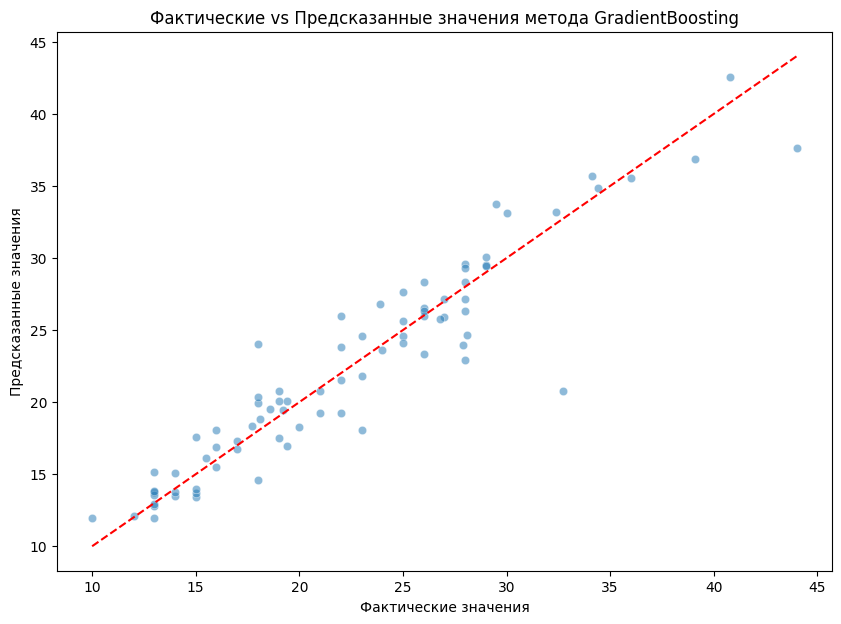

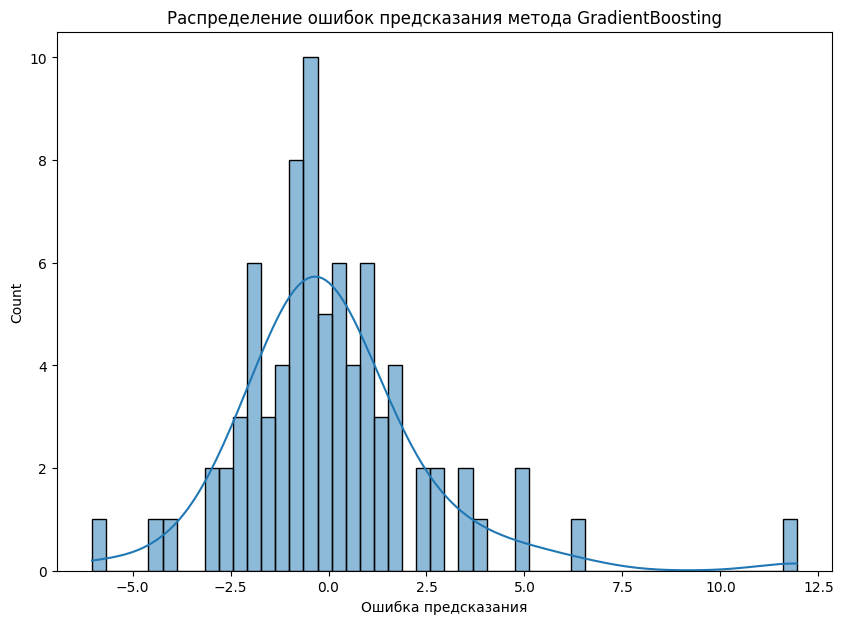

In [12]:
# Создание пустого списка для хранения результатов
results = []

# Тестирование моделей и сбор метрик
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
            'Model': name,
            'MSE': mse,
            'MAE': mae,
            'R2 Score': r2
    })
    # Визуализация фактических и предсказанных значений
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.title('Фактические vs Предсказанные значения метода ' + f'{name}')
    plt.show()
    # Визуализация распределения ошибок
    errors = y_test - y_pred
    plt.figure(figsize=(10, 7))
    sns.histplot(errors, bins=50, kde=True)
    plt.xlabel('Ошибка предсказания')
    plt.title('Распределение ошибок предсказания метода ' + f'{name}')
    plt.show()

In [13]:
# Создание DataFrame и вывод результатов
results_df = pd.DataFrame(results)
print(results_df)

              Model       MSE       MAE  R2 Score
0      RandomForest  6.192368  1.621650  0.880647
1        ExtraTrees  5.984991  1.633725  0.884644
2          AdaBoost  6.741924  1.989022  0.870055
3  GradientBoosting  6.011318  1.673116  0.884136
